<font size="5"> 
Disclaimer:
</font> 


These plots were coded to support the introductory part of a presentation on simulating Kolmogorov differential equations using stochastic processes and deep learning. They were developed as part of the applied mathematics course at the University of Vienna in 2024. Available for the interested audience.

<font size="5"> 
IMAGES FOR A: 
</font> 

1.- Brownian motion 

2.- Sanity checks of the plot. 

3.- Stochastic process with positive drift. 


In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import random as rand
from itertools import accumulate

params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (15,5),
          'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)

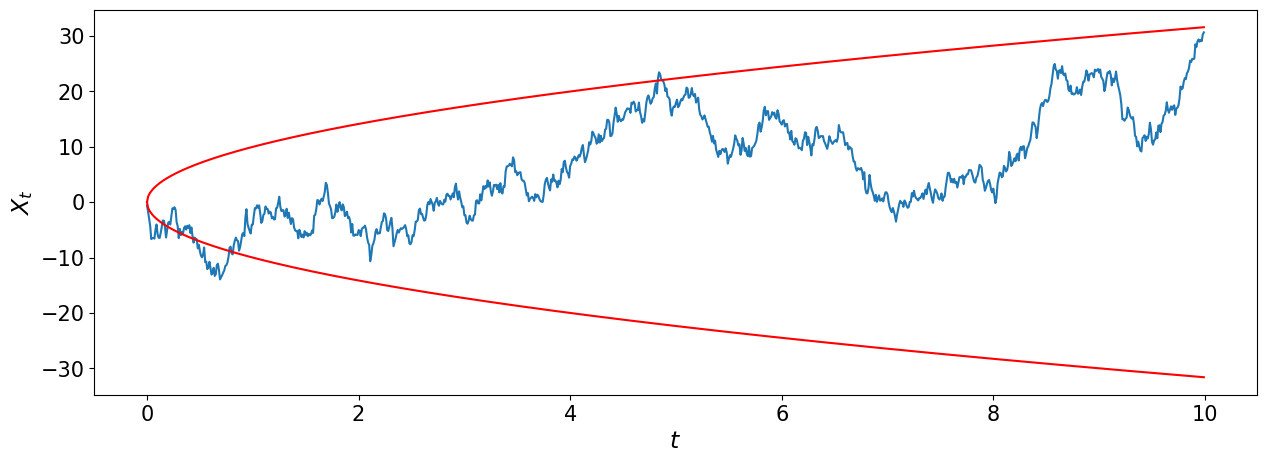

In [2]:
n = 1000
t_values = np.array([i for i in range(n)])
sample_values = np.array([rand.normalvariate(mu = 0, sigma = 1) for i in range(n)])
accumulate_values = np.cumsum(sample_values)

plt.ylabel('$X_t$')
plt.xlabel('$t$')
plt.plot(t_values/100, accumulate_values)
plt.plot(t_values / 100, np.sqrt(t_values), color="red", label=r"$\pm \sqrt{t}$")
plt.plot(t_values/100, -np.sqrt(t_values), color = "red")

0.18299775699531
4911.313756901466


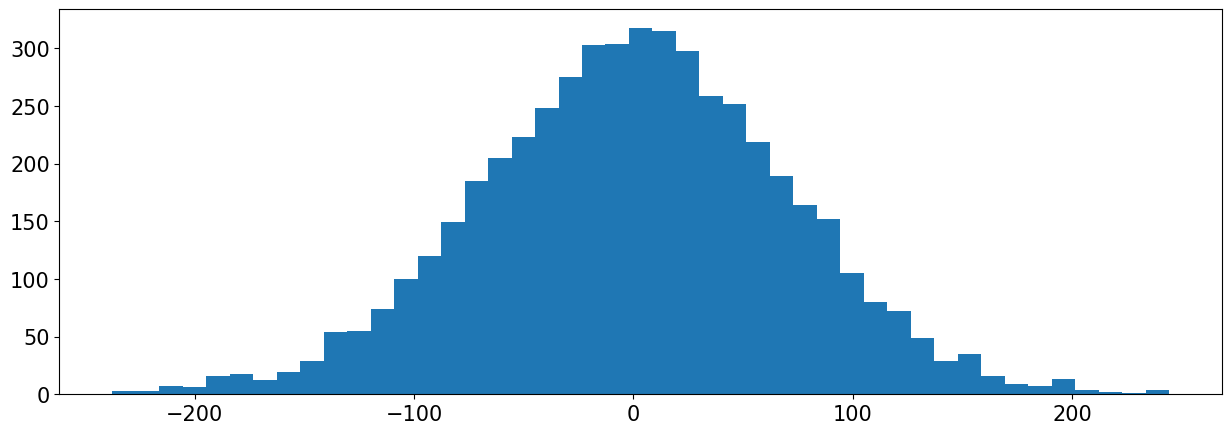

In [3]:
#running time 50 sec aprox. 
n = 5000 #number of steps
m = 5000 #number of paths

end_values = []
for j in range(m):
    end_value = np.sum(np.array([rand.normalvariate(mu = 0, sigma = 1) for i in range(n)]))
    end_values.append(end_value)
plt.hist(end_values, bins = 45)

#The distribution we expect to obtain is a normal N(mu, sigma^2) = N(0, n)
print(np.sum(end_values)/m) #Should be close to 0.
print(np.sum(np.array(end_values)**2)/(m-1)) #Should be close to n.

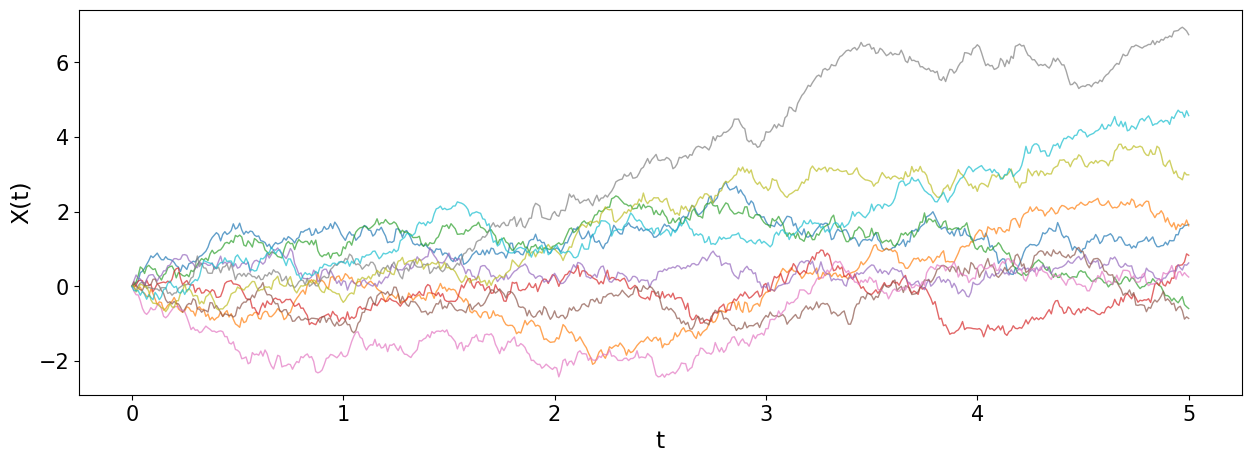

In [6]:
# Parameters
mu = 0.5       # Drift coefficient
sigma = 1.0    # Diffusion coefficient
T = 5.0        # Total time
dt = 0.01      # Time step
n_steps = int(T / dt)  # Number of time steps
n_paths = 10           # Number of sample paths

t = np.linspace(0, T, n_steps + 1)
X = np.zeros((n_paths, n_steps + 1))  
W = np.random.normal(0, np.sqrt(dt), size=(n_paths, n_steps))  # Brownian increments

for i in range(n_steps):
    X[:, i + 1] = X[:, i] + mu * dt + sigma * W[:, i] #Euler-Maruyama scheme

# Plot
for j in range(n_paths):
    plt.plot(t, X[j, :], lw=1, alpha=0.7)
plt.xlabel("t")
plt.ylabel("X(t)")
plt.grid(False)
plt.show()